<a href="https://colab.research.google.com/github/RuiaRui/project_CSM/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline

In [1]:
import bz2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm.notebook import tqdm
import pickle
import dill
import csv



### Load Data

In [2]:
path = '/content/drive/MyDrive/0401_UkraineCombinedTweetsDeduped.csv'
tweets_df = pd.read_csv(path, index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459


In [3]:
tweets_df.shape

(364875, 17)

In [4]:
tweets_df=tweets_df[tweets_df['text'].str.contains('refugee')]

In [5]:
tweets_df.shape

(2442, 17)

In [6]:
tweets_df

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
328,111091623,eilymurphy,Business ELT teacher in France - RTs are not e...,NaN,1335,1612,4781,2010-02-03 19:53:11.000000,1509682278514970628,2022-04-01 00:01:18.000000,65,Here’s the link to our therapeutic tale for #r...,"[{'text': 'refugee', 'indices': [62, 70]}, {'t...",en,NaN,0,2022-04-01 00:24:47.193038
364,1411655223752413184,clayella8585,NaN,NaN,52,663,32045,2021-07-04 11:58:41.000000,1509682320630026241,2022-04-01 00:01:28.000000,144,Russian Nobel peace prize winner sells medal t...,"[{'text': 'StopPutin', 'indices': [90, 100]}, ...",en,NaN,0,2022-04-01 00:31:38.127522
482,1147634388064186369,FrankPentangel1,Alive and kicking,NaN,132,98,9779,2019-07-06 22:32:14.000000,1509682449042878464,2022-04-01 00:01:59.000000,0,I see #ColmOGorman hasn’t volunteered to look ...,"[{'text': 'ColmOGorman', 'indices': [6, 18]}, ...",en,NaN,0,2022-04-01 00:24:45.471744
859,1377044106141171713,chaplainoftruth,Evangelist and a Chaplain for Go Ministry\nLas...,NaN,229,49,2240,2021-03-30 23:45:04.000000,1509682961377120257,2022-04-01 00:04:01.000000,3,A refugee from #Mariupol tells how the AFU/#Az...,"[{'text': 'Mariupol', 'indices': [33, 42]}, {'...",en,NaN,0,2022-04-01 00:31:35.950789
1004,1261153833524183041,TuggleTV,I read and write stuff.,NaN,101,18,4481,2020-05-15 04:38:34.000000,1509683141841096718,2022-04-01 00:04:44.000000,5,I’m on a longer assignment in #Warsaw #Poland ...,"[{'text': 'Warsaw', 'indices': [47, 54]}, {'te...",en,NaN,0,2022-04-01 00:24:40.867014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364376,1005670399676436480,ROYA__Ro,"🌸Yesterday I was clever,so I wanted 2 change t...",Covid 19 home arrest fev 2020,1260,748,43911,2018-06-10 04:38:02.000000,1510043732162326536,2022-04-01 23:57:35.000000,134,Interview with #Mariupol refugee⬇️\nYou know w...,"[{'text': 'Mariupol', 'indices': [36, 45]}]",en,NaN,0,2022-04-02 00:34:41.778968
364406,21351342,m42calhoun,NaN,NaN,552,804,470818,2009-02-19 23:17:15.000000,1510043767474163724,2022-04-01 23:57:44.000000,301,Join me for a special All Inclusive episode wi...,"[{'text': 'Ukraine', 'indices': [103, 111]}]",en,NaN,0,2022-04-02 00:05:02.152328
364427,1441125591827169287,MrsNftSizzle,I am Sunflower Puffer a.k.a Mrs. Sizzle\nCome ...,NaN,1301,1121,8118,2021-09-23 19:42:20.000000,1510043791087923200,2022-04-01 23:57:49.000000,4,"From now until indefinitely, I will be donatin...","[{'text': 'Ukraine', 'indices': [86, 94]}]",en,NaN,0,2022-04-02 00:05:01.155113
364755,367232248,TheNewsyCookson,Yorkshireman in New York! Producer of @firstmo...,NaN,2888,380,6649,2011-09-03 16:25:56.000000,1510044201249034251,2022-04-01 23:59:27.000000,18,"""$1,000 is exceptionally meaningful, helping t...","[{'text': 'Ukrainian', 'indices': [123, 133]}]",en,NaN,0,2022-04-02 00:13:17.460229


In [7]:
tweets_en=tweets_df[tweets_df.language=='en']
tweets_en=tweets_en[['tweetid','text','language']]
tweets_en.shape

(2354, 3)

In [8]:
tweets_en.text.apply(len).describe()

count    2354.000000
mean      249.345794
std        54.734481
min        53.000000
25%       222.000000
50%       267.000000
75%       296.000000
max       555.000000
Name: text, dtype: float64

In [9]:
tweets_en.text.head(10)

328     Here’s the link to our therapeutic tale for #r...
364     Russian Nobel peace prize winner sells medal t...
482     I see #ColmOGorman hasn’t volunteered to look ...
859     A refugee from #Mariupol tells how the AFU/#Az...
1004    I’m on a longer assignment in #Warsaw #Poland ...
1835    Here is a very emotional "thank you" video fro...
1856    THE HUMAN COST OF WAR: As conflict escalates i...
2267    THE HUMAN COST OF WAR: As conflict escalates i...
2518    @VerstyukIvan ... Great News from the Taprooms...
2576    🇺🇦 Next 9 April the EU will become one with #U...
Name: text, dtype: object

## Preprcess the data

In [10]:
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

tweets_en['text'] = tweets_en['text'].str.lower()
tweets_en['text'] = tweets_en['text'].apply(remove_urls)
tweets_en['text'] = tweets_en['text'].apply(deEmojify)
tweets_en['text'] = tweets_en['text'].apply(remove_symbols)


In [12]:
tweets_en.text.head(10)

328     here s the link to our therapeutic tale for re...
364     russian nobel peace prize winner sells medal t...
482     i see colmogorman hasn t volunteered to look a...
859     a refugee from mariupol tells how the afu azov...
1004    i m on a longer assignment in warsaw poland co...
1835    here is a very emotional thank you video from ...
1856    the human cost of war as conflict escalates in...
2267    the human cost of war as conflict escalates in...
2518     verstyukivan ... great news from the taprooms...
2576     next 9 april the eu will become one with ukra...
Name: text, dtype: object

## Sentimental Analysis

In [13]:
! pip install transformers
! pip install sentencepiece

     |████████████████████████████████| 4.0 MB 36.9 MB/s 
     |████████████████████████████████| 596 kB 54.4 MB/s 
     |████████████████████████████████| 895 kB 59.0 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 6.6 MB 56.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 29.2 MB/s 


In [14]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import urllib.request
from scipy.special import softmax

In [15]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

### RoBERTa

In [16]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [18]:
model = model.to("cuda:0")

In [19]:
tensors = []
for tweet in tqdm(tweets_en.text):
    encoded_input = tokenizer(tweet, return_tensors='pt').to("cuda:0")
    output = model(**encoded_input)
    tensors.append(output[0][0].detach())

  0%|          | 0/2354 [00:00<?, ?it/s]

In [20]:
tweets_scores = []
for t in tensors:
    scores = t.cpu().numpy()
    scores = softmax(scores)
    tweets_scores.append(scores)

In [21]:
tweets_en['score']=tweets_scores
tweets_en

,tweetid,text,language,score
328,1509682278514970628,here s the link to our therapeutic tale for re...,en,"[0.023352372, 0.7755492, 0.20109852]"
364,1509682320630026241,russian nobel peace prize winner sells medal t...,en,"[0.15858804, 0.79748255, 0.043929413]"
482,1509682449042878464,i see colmogorman hasn t volunteered to look a...,en,"[0.43660995, 0.512887, 0.050503023]"
859,1509682961377120257,a refugee from mariupol tells how the afu azov...,en,"[0.7768869, 0.2177189, 0.0053942273]"
1004,1509683141841096718,i m on a longer assignment in warsaw poland co...,en,"[0.43578202, 0.47960344, 0.08461449]"
...,...,...,...,...
364376,1510043732162326536,interview with mariupol refugee you know what ...,en,"[0.8293207, 0.16191182, 0.008767578]"
364406,1510043767474163724,join me for a special all inclusive episode wi...,en,"[0.0126206875, 0.4972243, 0.49015486]"
364427,1510043791087923200,"from now until indefinitely, i will be donatin...",en,"[0.03316673, 0.7298903, 0.23694287]"
364755,1510044201249034251,"1,000 is exceptionally meaningful, helping th...",en,"[0.0032609066, 0.105637014, 0.891102]"


In [22]:
tweets_en['negative_sentiment'] = [x[0] for x in tweets_en['score']]
tweets_en['neutral_sentiment'] = [x[1] for x in tweets_en['score']]
tweets_en['positive_sentiment'] = [x[2] for x in tweets_en['score']]
tweets_en['max_sentiment'] = [labels[np.argmax(x)] for x in tweets_en['score']]


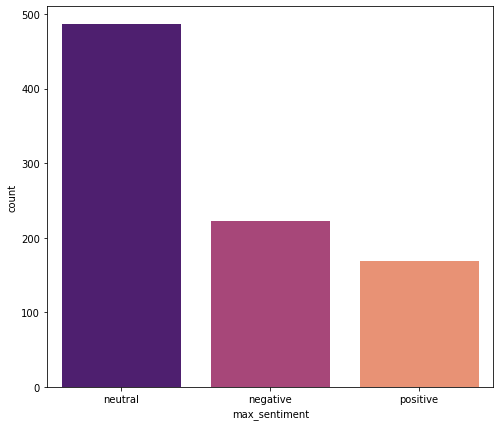

In [45]:
plt.figure(figsize = (8,7))
sns.countplot(x="max_sentiment", data=tweets_en.drop_duplicates(subset=['text']), palette='magma')

In [47]:
tweets_en=tweets_en.drop_duplicates(subset=['text'])
tweets_en.shape

(878, 8)

In [26]:
tweets_df.text.loc[328]

'Here’s the link to our therapeutic tale for #refugee children from #Ukraine. In two language versions (UKR &amp; RUS). PL &amp; ENG translations available. #HelpUkraine \n\nhttps://t.co/0fst9dsj0w\n\nPleast, please RT'

In [27]:
tweets_en.text.loc[328]

'here s the link to our therapeutic tale for refugee children from ukraine. in two language versions ukr amp rus . pl amp eng translations available. helpukraine pleast, please rt'

In [28]:
tweets_en.max_sentiment.loc[328]

'neutral'

In [51]:
for t in tweets_en[tweets_en['max_sentiment']=='negative'].text.head(10):
  print(t)

a refugee from mariupol tells how the afu azov fired at their car with children while they were trying to leave the city. ukraine 
 because is a landlocked country without a navy, nuclear bombs, etc. because is neutral because accepts ukrainian refugees because armenians help ukrainians because artsakh send 140 tons of humanitarian aid because this is fake news ukraine armenia 
anyone saying that the ukraine conflict started in feb is either lying or is clueless. the world has millions of more refugees today because of the regime change amp nato expansion headed by the us in 2014. not to mention the us using our tax dollars to fund nazis in ukraine. 
 ukrainian nazis from azov against whose fighters criminal proceedings were already initiated in the russian federation fired at a kindergarten in mariupol, killed civilians who came there in search of water, said a refugee from the city, roman postilnik. 
imagine taking in scared, vulnerable female refugees who don t speak the language an

In [ ]:
tweets_en.to_json('/content/drive/MyDrive/0401_UkraineCombinedTweetsDeduped_SA_BERT.json.bz2')

### bert-base-multilingual-uncased-sentiment

In [29]:
support_lang=['en','nl','de','fr','it','es']
tweets_mutilang=tweets_df[tweets_df.language.isin(support_lang)]
tweets_mutilang=tweets_mutilang[['tweetid','text','language']]
tweets_mutilang.shape

(2373, 3)

In [30]:
tweets_mutilang.head()

,tweetid,text,language
328,1509682278514970628,Here’s the link to our therapeutic tale for #r...,en
364,1509682320630026241,Russian Nobel peace prize winner sells medal t...,en
482,1509682449042878464,I see #ColmOGorman hasn’t volunteered to look ...,en
859,1509682961377120257,A refugee from #Mariupol tells how the AFU/#Az...,en
1004,1509683141841096718,I’m on a longer assignment in #Warsaw #Poland ...,en


In [31]:
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

tweets_mutilang['text'] = tweets_mutilang['text'].str.lower()
tweets_mutilang['text'] = tweets_mutilang['text'].apply(remove_urls)
tweets_mutilang['text'] = tweets_mutilang['text'].apply(deEmojify)
tweets_mutilang['text'] = tweets_mutilang['text'].apply(remove_symbols)


In [32]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import urllib.request
from scipy.special import softmax

MODEL_ML = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ML)
config = AutoConfig.from_pretrained(MODEL_ML)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ML)
model.save_pretrained(MODEL_ML)

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

In [33]:
model = model.to("cuda:0")
tensors = []
for tweet in tqdm(tweets_mutilang.text):
    encoded_input = tokenizer(tweet, return_tensors='pt').to("cuda:0")
    output = model(**encoded_input)
    tensors.append(output[0][0].detach())

  0%|          | 0/2373 [00:00<?, ?it/s]

In [34]:
tweets_scores = []
for t in tensors:
    scores = t.cpu().numpy()
    scores = softmax(scores)
    tweets_scores.append(scores)

In [35]:
tweets_mutilang['score']=tweets_scores
tweets_mutilang

,tweetid,text,language,score
328,1509682278514970628,here s the link to our therapeutic tale for re...,en,"[0.25030813, 0.55910873, 0.1905832]"
364,1509682320630026241,russian nobel peace prize winner sells medal t...,en,"[0.3090142, 0.37156504, 0.31942075]"
482,1509682449042878464,i see colmogorman hasn t volunteered to look a...,en,"[0.81629825, 0.13477656, 0.048925217]"
859,1509682961377120257,a refugee from mariupol tells how the afu azov...,en,"[0.76577264, 0.21062854, 0.023598751]"
1004,1509683141841096718,i m on a longer assignment in warsaw poland co...,en,"[0.8186264, 0.1370871, 0.04428656]"
...,...,...,...,...
364376,1510043732162326536,interview with mariupol refugee you know what ...,en,"[0.8078652, 0.15799068, 0.034144055]"
364406,1510043767474163724,join me for a special all inclusive episode wi...,en,"[0.24924268, 0.42798322, 0.32277414]"
364427,1510043791087923200,"from now until indefinitely, i will be donatin...",en,"[0.19145289, 0.5727752, 0.23577194]"
364755,1510044201249034251,"1,000 is exceptionally meaningful, helping th...",en,"[0.16290987, 0.27866545, 0.55842483]"


In [36]:
tweets_mutilang['negative_sentiment'] = [x[0] for x in tweets_mutilang['score']]
tweets_mutilang['neutral_sentiment'] = [x[1] for x in tweets_mutilang['score']]
tweets_mutilang['positive_sentiment'] = [x[2] for x in tweets_mutilang['score']]
tweets_mutilang['max_sentiment'] = [labels[np.argmax(x)] for x in tweets_mutilang['score']]


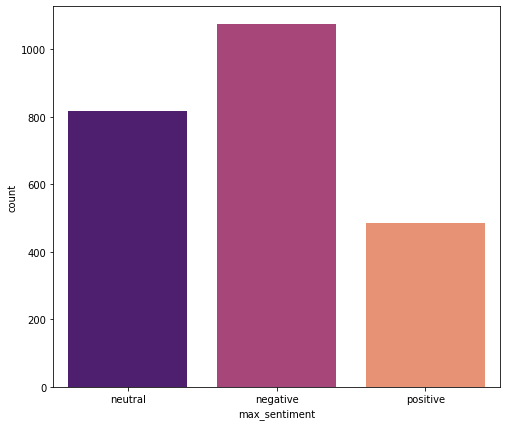

In [37]:
plt.figure(figsize = (8,7))
sns.countplot(x="max_sentiment", data=tweets_mutilang, palette='magma')

In [ ]:
tweets_mutilang.to_json('/content/drive/MyDrive/0401_UkraineCombinedTweetsDeduped_SA_MuitL.json.bz2')